In [93]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import  mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [4]:
smdb = pd.read_csv('../Data/vgsales-12-4-2019-short.csv')
sglobal = pd.read_csv('../Data/vgsalesGlobale2.csv')
pd.set_option('display.max_columns', None)

In [8]:
smdb.head()

In [5]:
sglobal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
sglobal.isna().sum()# So I am running with the sglobal DF

In [6]:
# Only about 320 NaNs so I am dropping them!
sglobal_clean = sglobal.dropna()

In [7]:
sglobal_clean = sglobal_clean.set_index("Rank") 

In [8]:
sglobal_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
remake = np.array(sglobal_clean['Name'].duplicated())
remake_df = pd.DataFrame(remake, columns=['Remake'], index=sglobal_clean.index)
remake_df.head()

,Remake
Rank,
1,False
2,False
3,False
4,False
5,False


In [10]:
sglobal_clean = pd.concat((sglobal_clean,remake_df), axis=1)
sglobal_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Remake
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,False
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,False
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,False
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,False
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,False


In [11]:
sglobal_clean['Remake'] = sglobal_clean['Remake'].astype(int)
sglobal_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Remake
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0


In [24]:
sglobal.head(-5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.00,0.01


In [ ]:
top_names = sglobal['Name'][0:5]
top_sales = sglobal['Global_Sales'][0:5]
print(top_names)
print(top_sales)

In [ ]:
bottom_names = sglobal['Name'][-5:]
bottom_sales = sglobal['Global_Sales'][-5:]
bottom_names

In [ ]:
a4_dims = (6, 4)
sns.set(font_scale=.80)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x=bottom_names, y=bottom_sales, ci=False).set_title('Bottom Global sellers')
plt.xticks(rotation=45)
plt.ylabel('Global Sales')
plt.xlabel(None)
# plt.savefig('Least Sellers', bbox_inches = "tight")
plt.show()

In [25]:
sglobal_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Remake
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0


In [12]:
# Didn't think the name of the videogame would matter if I had the sales record so I dropped it
sglobal_clean.drop(columns=['Name'], axis=1, inplace=True)

In [ ]:
sglobal_clean.head()

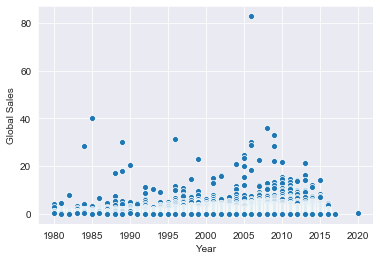

In [33]:
sns.set_style('darkgrid')
sns.scatterplot(sglobal_clean.Year, sglobal_clean.Global_Sales);
plt.ylabel('Global Sales')
plt.savefig('GsalesScatter')
plt.show()

In [ ]:
sglobal[sglobal['Name']== "Imagine: Makeup Artist"]

In [38]:
sglobal_clean.drop(sglobal_clean.index[sglobal_clean["Year"] == 2020.0], inplace = True)

In [44]:
sglobal_clean.drop(sglobal_clean.index[sglobal_clean["Global_Sales"] == 82.74], inplace = True)

In [43]:
sglobal_clean.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Remake
Rank,,,,,,,,,,
2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0
3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0
4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0
5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0
6,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,0


### Making FSM

In [138]:
# Instantiating Vars 
y = sglobal_clean['Global_Sales']
X = sglobal_clean.drop('Global_Sales', axis=1)

In [139]:
# Instantiating train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [47]:
X_train.shape

(13032, 9)

In [48]:
X_test.shape

(3258, 9)

In [49]:
y_train.shape

(13032,)

In [151]:
y_test.shape

(3258,)

In [141]:
# One hotting categorical columns
ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(X_train[['Platform', 'Genre', 'Publisher']])

ohe_cats = pd.DataFrame(ohe.transform(X_train[['Platform', 'Genre', 'Publisher']]).todense(), 
                        columns=ohe.get_feature_names(),index=X_train.index)

ohe_cats.head()

,x0_2600,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_N64,x0_NES,x0_NG,x0_PC,x0_PCFX,x0_PS,x0_PS2,x0_PS3,x0_PS4,x0_PSP,x0_PSV,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne,x1_Action,x1_Adventure,x1_Fighting,x1_Misc,x1_Platform,x1_Puzzle,x1_Racing,x1_Role-Playing,x1_Shooter,x1_Simulation,x1_Sports,x1_Strategy,x2_10TACLE Studios,x2_1C Company,x2_20th Century Fox Video Games,x2_2D Boy,x2_3DO,x2_49Games,x2_505 Games,x2_5pb,x2_7G//AMES,x2_989 Studios,x2_AQ Interactive,x2_ASC Games,x2_ASCII Entertainment,x2_ASCII Media Works,x2_ASK,x2_Abylight,x2_Acclaim Entertainment,x2_Accolade,x2_Ackkstudios,x2_Acquire,x2_Activision,x2_Activision Value,x2_Adeline Software,x2_Aerosoft,x2_Agatsuma Entertainment,x2_Agetec,x2_Aksys Games,x2_Alawar Entertainment,x2_Alchemist,x2_Alternative Software,x2_Alvion,x2_American Softworks,x2_Angel Studios,x2_Answer Software,x2_Aqua Plus,x2_Arc System Works,x2_Arena Entertainment,x2_Arika,x2_ArtDink,x2_Aruze Corp,x2_Ascaron Entertainment GmbH,x2_Asgard,x2_Asmik Ace Entertainment,x2_Asmik Corp,x2_Aspyr,x2_Astragon,x2_Asylum Entertainment,x2_Atari,x2_Athena,x2_Atlus,x2_Avalon Interactive,x2_Avanquest,x2_Avanquest Software,x2_Axela,x2_BAM! Entertainment,x2_BMG Interactive Entertainment,x2_BPS,x2_Banpresto,x2_Benesse,x2_Berkeley,x2_Bethesda Softworks,x2_Big Ben Interactive,x2_Big Fish Games,x2_Bigben Interactive,x2_Black Bean Games,x2_Black Label Games,x2_Blast! Entertainment Ltd,x2_Blue Byte,x2_Bomb,x2_Boost On,x2_Brash Entertainment,x2_Broccoli,x2_BushiRoad,x2_CBS Electronics,x2_CCP,x2_CDV Software Entertainment,x2_CPG Products,x2_CTO SpA,x2_Capcom,x2_Cave,x2_ChunSoft,x2_City Interactive,x2_Cloud Imperium Games Corporation,x2_Coconuts Japan,x2_Codemasters,x2_Codemasters Online,x2_Coleco,x2_Comfort,x2_Commseed,x2_Compile,x2_Compile Heart,x2_Conspiracy Entertainment,x2_Core Design Ltd.,x2_Crave Entertainment,x2_Creative Core,x2_Crimson Cow,x2_Crystal Dynamics,x2_Culture Brain,x2_Culture Publishers,x2_CyberFront,x2_Cygames,x2_D3Publisher,x2_DHM Interactive,x2_DSI Games,x2_DTP Entertainment,x2_Daedalic,x2_Daedalic Entertainment,x2_Daito,x2_Data Age,x2_Data Design Interactive,x2_Data East,x2_Datam Polystar,x2_Deep Silver,"x2_Destination Software, Inc",x2_Destineer,x2_Detn8 Games,x2_DigiCube,x2_Disney Interactive Studios,x2_Dorart,x2_DreamCatcher Interactive,x2_DreamWorks Interactive,x2_Dusenberry Martin Racing,x2_EA Games,x2_EON Digital Entertainment,x2_ESP,x2_Ecole,x2_Edia,x2_Eidos Interactive,x2_Electronic Arts,x2_Electronic Arts Victor,x2_Elf,x2_Elite,x2_Empire Interactive,x2_Encore,x2_Enix Corporation,x2_Enjoy Gaming ltd.,x2_Enterbrain,x2_Epic Games,x2_Epoch,x2_Ertain,x2_Essential Games,x2_Evolution Games,x2_Evolved Games,x2_Excalibur Publishing,x2_Experience Inc.,x2_Extreme Entertainment Group,x2_Falcom Corporation,x2_Fields,x2_Flashpoint Games,x2_Flight-Plan,x2_Focus Home Interactive,x2_Focus Multimedia,x2_Foreign Media Games,x2_Fox Interactive,x2_From Software,x2_FuRyu,x2_FuRyu Corporation,x2_Fuji,x2_FunSoft,x2_Funbox Media,x2_Funcom,x2_Funsta,x2_G.Rev,x2_GN Software,x2_GOA,x2_GSP,x2_GT Interactive,x2_Gaga,x2_Gainax Network Systems,x2_Gakken,x2_Game Arts,x2_Game Factory,x2_Game Life,x2_GameMill Entertainment,x2_GameTek,x2_Gamebridge,x2_Gamecock,x2_Gameloft,x2_Gathering of Developers,x2_General Entertainment,x2_Genki,x2_Ghostlight,x2_Giga,x2_Giza10,x2_Glams,x2_Global A Entertainment,x2_Global Star,x2_Gotham Games,x2_Graffiti,x2_Grand Prix Games,x2_Graphsim Entertainment,x2_Gremlin Interactive Ltd,x2_Griffin International,x2_Groove Games,x2_GungHo,x2_Gust,x2_HAL Laboratory,x2_HMH Interactive,x2_Hackberry,x2_Hamster Corporation,x2_Happinet,x2_Harmonix Music Systems,x2_Hasbro Interactive,x2_Havas Interactive,x2_Headup Games,x2_Hearty Robin,x2_Hect,x2_Hello Games,x2_Her Interactive,x2_Hip Interactive,x2_Home Entertainment Suppliers,x2_Hudson Entertainment,x2_Hudson Soft,x2_Human Entertainment,x2_HuneX,x2_IE Institute,x2_ITT Family Games,x2_Iceberg Interactive,x2_Idea Factory,x2_I

In [142]:
# One hotting categorical columns

ohe_cats_test= pd.DataFrame(ohe.transform(X_test[['Platform', 'Genre', 'Publisher']]).todense(), 
                        columns=ohe.get_feature_names(),index=X_test.index)

ohe_cats_test.head()

,x0_2600,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_N64,x0_NES,x0_NG,x0_PC,x0_PCFX,x0_PS,x0_PS2,x0_PS3,x0_PS4,x0_PSP,x0_PSV,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne,x1_Action,x1_Adventure,x1_Fighting,x1_Misc,x1_Platform,x1_Puzzle,x1_Racing,x1_Role-Playing,x1_Shooter,x1_Simulation,x1_Sports,x1_Strategy,x2_10TACLE Studios,x2_1C Company,x2_20th Century Fox Video Games,x2_2D Boy,x2_3DO,x2_49Games,x2_505 Games,x2_5pb,x2_7G//AMES,x2_989 Studios,x2_AQ Interactive,x2_ASC Games,x2_ASCII Entertainment,x2_ASCII Media Works,x2_ASK,x2_Abylight,x2_Acclaim Entertainment,x2_Accolade,x2_Ackkstudios,x2_Acquire,x2_Activision,x2_Activision Value,x2_Adeline Software,x2_Aerosoft,x2_Agatsuma Entertainment,x2_Agetec,x2_Aksys Games,x2_Alawar Entertainment,x2_Alchemist,x2_Alternative Software,x2_Alvion,x2_American Softworks,x2_Angel Studios,x2_Answer Software,x2_Aqua Plus,x2_Arc System Works,x2_Arena Entertainment,x2_Arika,x2_ArtDink,x2_Aruze Corp,x2_Ascaron Entertainment GmbH,x2_Asgard,x2_Asmik Ace Entertainment,x2_Asmik Corp,x2_Aspyr,x2_Astragon,x2_Asylum Entertainment,x2_Atari,x2_Athena,x2_Atlus,x2_Avalon Interactive,x2_Avanquest,x2_Avanquest Software,x2_Axela,x2_BAM! Entertainment,x2_BMG Interactive Entertainment,x2_BPS,x2_Banpresto,x2_Benesse,x2_Berkeley,x2_Bethesda Softworks,x2_Big Ben Interactive,x2_Big Fish Games,x2_Bigben Interactive,x2_Black Bean Games,x2_Black Label Games,x2_Blast! Entertainment Ltd,x2_Blue Byte,x2_Bomb,x2_Boost On,x2_Brash Entertainment,x2_Broccoli,x2_BushiRoad,x2_CBS Electronics,x2_CCP,x2_CDV Software Entertainment,x2_CPG Products,x2_CTO SpA,x2_Capcom,x2_Cave,x2_ChunSoft,x2_City Interactive,x2_Cloud Imperium Games Corporation,x2_Coconuts Japan,x2_Codemasters,x2_Codemasters Online,x2_Coleco,x2_Comfort,x2_Commseed,x2_Compile,x2_Compile Heart,x2_Conspiracy Entertainment,x2_Core Design Ltd.,x2_Crave Entertainment,x2_Creative Core,x2_Crimson Cow,x2_Crystal Dynamics,x2_Culture Brain,x2_Culture Publishers,x2_CyberFront,x2_Cygames,x2_D3Publisher,x2_DHM Interactive,x2_DSI Games,x2_DTP Entertainment,x2_Daedalic,x2_Daedalic Entertainment,x2_Daito,x2_Data Age,x2_Data Design Interactive,x2_Data East,x2_Datam Polystar,x2_Deep Silver,"x2_Destination Software, Inc",x2_Destineer,x2_Detn8 Games,x2_DigiCube,x2_Disney Interactive Studios,x2_Dorart,x2_DreamCatcher Interactive,x2_DreamWorks Interactive,x2_Dusenberry Martin Racing,x2_EA Games,x2_EON Digital Entertainment,x2_ESP,x2_Ecole,x2_Edia,x2_Eidos Interactive,x2_Electronic Arts,x2_Electronic Arts Victor,x2_Elf,x2_Elite,x2_Empire Interactive,x2_Encore,x2_Enix Corporation,x2_Enjoy Gaming ltd.,x2_Enterbrain,x2_Epic Games,x2_Epoch,x2_Ertain,x2_Essential Games,x2_Evolution Games,x2_Evolved Games,x2_Excalibur Publishing,x2_Experience Inc.,x2_Extreme Entertainment Group,x2_Falcom Corporation,x2_Fields,x2_Flashpoint Games,x2_Flight-Plan,x2_Focus Home Interactive,x2_Focus Multimedia,x2_Foreign Media Games,x2_Fox Interactive,x2_From Software,x2_FuRyu,x2_FuRyu Corporation,x2_Fuji,x2_FunSoft,x2_Funbox Media,x2_Funcom,x2_Funsta,x2_G.Rev,x2_GN Software,x2_GOA,x2_GSP,x2_GT Interactive,x2_Gaga,x2_Gainax Network Systems,x2_Gakken,x2_Game Arts,x2_Game Factory,x2_Game Life,x2_GameMill Entertainment,x2_GameTek,x2_Gamebridge,x2_Gamecock,x2_Gameloft,x2_Gathering of Developers,x2_General Entertainment,x2_Genki,x2_Ghostlight,x2_Giga,x2_Giza10,x2_Glams,x2_Global A Entertainment,x2_Global Star,x2_Gotham Games,x2_Graffiti,x2_Grand Prix Games,x2_Graphsim Entertainment,x2_Gremlin Interactive Ltd,x2_Griffin International,x2_Groove Games,x2_GungHo,x2_Gust,x2_HAL Laboratory,x2_HMH Interactive,x2_Hackberry,x2_Hamster Corporation,x2_Happinet,x2_Harmonix Music Systems,x2_Hasbro Interactive,x2_Havas Interactive,x2_Headup Games,x2_Hearty Robin,x2_Hect,x2_Hello Games,x2_Her Interactive,x2_Hip Interactive,x2_Home Entertainment Suppliers,x2_Hudson Entertainment,x2_Hudson Soft,x2_Human Entertainment,x2_HuneX,x2_IE Institute,x2_ITT Family Games,x2_Iceberg Interactive,x2_Idea Factory,x2_I

In [143]:
# Dropping the unnecessary columns
X_test.drop(columns=['Platform', 'Genre', 'Publisher'], axis=1, inplace=True)

In [144]:
# Dropping the unnecessary columns
X_train.drop(columns=['Platform', 'Genre', 'Publisher'], axis=1, inplace=True)

In [ ]:
X_train.head()

In [150]:
X_test.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Remake
Rank,,,,,,
3530,2004.0,0.47,0.02,0.00,0.08,0
15219,2012.0,0.00,0.00,0.02,0.00,0
5565,2008.0,0.30,0.00,0.00,0.02,0
3033,1999.0,0.19,0.13,0.31,0.04,0
8888,2009.0,0.14,0.00,0.00,0.01,0


In [145]:
# Adding the one hotted columns back into the DF
X_train_ohe = pd.concat([X_train, ohe_cats], axis=1)
X_train_ohe.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Remake,x0_2600,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_N64,x0_NES,x0_NG,x0_PC,x0_PCFX,x0_PS,x0_PS2,x0_PS3,x0_PS4,x0_PSP,x0_PSV,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne,x1_Action,x1_Adventure,x1_Fighting,x1_Misc,x1_Platform,x1_Puzzle,x1_Racing,x1_Role-Playing,x1_Shooter,x1_Simulation,x1_Sports,x1_Strategy,x2_10TACLE Studios,x2_1C Company,x2_20th Century Fox Video Games,x2_2D Boy,x2_3DO,x2_49Games,x2_505 Games,x2_5pb,x2_7G//AMES,x2_989 Studios,x2_AQ Interactive,x2_ASC Games,x2_ASCII Entertainment,x2_ASCII Media Works,x2_ASK,x2_Abylight,x2_Acclaim Entertainment,x2_Accolade,x2_Ackkstudios,x2_Acquire,x2_Activision,x2_Activision Value,x2_Adeline Software,x2_Aerosoft,x2_Agatsuma Entertainment,x2_Agetec,x2_Aksys Games,x2_Alawar Entertainment,x2_Alchemist,x2_Alternative Software,x2_Alvion,x2_American Softworks,x2_Angel Studios,x2_Answer Software,x2_Aqua Plus,x2_Arc System Works,x2_Arena Entertainment,x2_Arika,x2_ArtDink,x2_Aruze Corp,x2_Ascaron Entertainment GmbH,x2_Asgard,x2_Asmik Ace Entertainment,x2_Asmik Corp,x2_Aspyr,x2_Astragon,x2_Asylum Entertainment,x2_Atari,x2_Athena,x2_Atlus,x2_Avalon Interactive,x2_Avanquest,x2_Avanquest Software,x2_Axela,x2_BAM! Entertainment,x2_BMG Interactive Entertainment,x2_BPS,x2_Banpresto,x2_Benesse,x2_Berkeley,x2_Bethesda Softworks,x2_Big Ben Interactive,x2_Big Fish Games,x2_Bigben Interactive,x2_Black Bean Games,x2_Black Label Games,x2_Blast! Entertainment Ltd,x2_Blue Byte,x2_Bomb,x2_Boost On,x2_Brash Entertainment,x2_Broccoli,x2_BushiRoad,x2_CBS Electronics,x2_CCP,x2_CDV Software Entertainment,x2_CPG Products,x2_CTO SpA,x2_Capcom,x2_Cave,x2_ChunSoft,x2_City Interactive,x2_Cloud Imperium Games Corporation,x2_Coconuts Japan,x2_Codemasters,x2_Codemasters Online,x2_Coleco,x2_Comfort,x2_Commseed,x2_Compile,x2_Compile Heart,x2_Conspiracy Entertainment,x2_Core Design Ltd.,x2_Crave Entertainment,x2_Creative Core,x2_Crimson Cow,x2_Crystal Dynamics,x2_Culture Brain,x2_Culture Publishers,x2_CyberFront,x2_Cygames,x2_D3Publisher,x2_DHM Interactive,x2_DSI Games,x2_DTP Entertainment,x2_Daedalic,x2_Daedalic Entertainment,x2_Daito,x2_Data Age,x2_Data Design Interactive,x2_Data East,x2_Datam Polystar,x2_Deep Silver,"x2_Destination Software, Inc",x2_Destineer,x2_Detn8 Games,x2_DigiCube,x2_Disney Interactive Studios,x2_Dorart,x2_DreamCatcher Interactive,x2_DreamWorks Interactive,x2_Dusenberry Martin Racing,x2_EA Games,x2_EON Digital Entertainment,x2_ESP,x2_Ecole,x2_Edia,x2_Eidos Interactive,x2_Electronic Arts,x2_Electronic Arts Victor,x2_Elf,x2_Elite,x2_Empire Interactive,x2_Encore,x2_Enix Corporation,x2_Enjoy Gaming ltd.,x2_Enterbrain,x2_Epic Games,x2_Epoch,x2_Ertain,x2_Essential Games,x2_Evolution Games,x2_Evolved Games,x2_Excalibur Publishing,x2_Experience Inc.,x2_Extreme Entertainment Group,x2_Falcom Corporation,x2_Fields,x2_Flashpoint Games,x2_Flight-Plan,x2_Focus Home Interactive,x2_Focus Multimedia,x2_Foreign Media Games,x2_Fox Interactive,x2_From Software,x2_FuRyu,x2_FuRyu Corporation,x2_Fuji,x2_FunSoft,x2_Funbox Media,x2_Funcom,x2_Funsta,x2_G.Rev,x2_GN Software,x2_GOA,x2_GSP,x2_GT Interactive,x2_Gaga,x2_Gainax Network Systems,x2_Gakken,x2_Game Arts,x2_Game Factory,x2_Game Life,x2_GameMill Entertainment,x2_GameTek,x2_Gamebridge,x2_Gamecock,x2_Gameloft,x2_Gathering of Developers,x2_General Entertainment,x2_Genki,x2_Ghostlight,x2_Giga,x2_Giza10,x2_Glams,x2_Global A Entertainment,x2_Global Star,x2_Gotham Games,x2_Graffiti,x2_Grand Prix Games,x2_Graphsim Entertainment,x2_Gremlin Interactive Ltd,x2_Griffin International,x2_Groove Games,x2_GungHo,x2_Gust,x2_HAL Laboratory,x2_HMH Interactive,x2_Hackberry,x2_Hamster Corporation,x2_Happinet,x2_Harmonix Music Systems,x2_Hasbro Interactive,x2_Havas Interactive,x2_Headup Games,x2_Hearty Robin,x2_Hect,x2_Hello Games,x2_Her Interactive,x2_Hip Interactive,x2_Home Entertainment Suppliers,x2_Hudson Entertainment,x2_Hudson Soft,x2_Human Entertainment,x2_HuneX,x2_IE Institute,x2_ITT Famil

In [146]:
# Adding the one hotted columns back into the DF
X_test_ohe = pd.concat([X_test, ohe_cats_test], axis=1)
X_test_ohe.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Remake,x0_2600,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_N64,x0_NES,x0_NG,x0_PC,x0_PCFX,x0_PS,x0_PS2,x0_PS3,x0_PS4,x0_PSP,x0_PSV,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne,x1_Action,x1_Adventure,x1_Fighting,x1_Misc,x1_Platform,x1_Puzzle,x1_Racing,x1_Role-Playing,x1_Shooter,x1_Simulation,x1_Sports,x1_Strategy,x2_10TACLE Studios,x2_1C Company,x2_20th Century Fox Video Games,x2_2D Boy,x2_3DO,x2_49Games,x2_505 Games,x2_5pb,x2_7G//AMES,x2_989 Studios,x2_AQ Interactive,x2_ASC Games,x2_ASCII Entertainment,x2_ASCII Media Works,x2_ASK,x2_Abylight,x2_Acclaim Entertainment,x2_Accolade,x2_Ackkstudios,x2_Acquire,x2_Activision,x2_Activision Value,x2_Adeline Software,x2_Aerosoft,x2_Agatsuma Entertainment,x2_Agetec,x2_Aksys Games,x2_Alawar Entertainment,x2_Alchemist,x2_Alternative Software,x2_Alvion,x2_American Softworks,x2_Angel Studios,x2_Answer Software,x2_Aqua Plus,x2_Arc System Works,x2_Arena Entertainment,x2_Arika,x2_ArtDink,x2_Aruze Corp,x2_Ascaron Entertainment GmbH,x2_Asgard,x2_Asmik Ace Entertainment,x2_Asmik Corp,x2_Aspyr,x2_Astragon,x2_Asylum Entertainment,x2_Atari,x2_Athena,x2_Atlus,x2_Avalon Interactive,x2_Avanquest,x2_Avanquest Software,x2_Axela,x2_BAM! Entertainment,x2_BMG Interactive Entertainment,x2_BPS,x2_Banpresto,x2_Benesse,x2_Berkeley,x2_Bethesda Softworks,x2_Big Ben Interactive,x2_Big Fish Games,x2_Bigben Interactive,x2_Black Bean Games,x2_Black Label Games,x2_Blast! Entertainment Ltd,x2_Blue Byte,x2_Bomb,x2_Boost On,x2_Brash Entertainment,x2_Broccoli,x2_BushiRoad,x2_CBS Electronics,x2_CCP,x2_CDV Software Entertainment,x2_CPG Products,x2_CTO SpA,x2_Capcom,x2_Cave,x2_ChunSoft,x2_City Interactive,x2_Cloud Imperium Games Corporation,x2_Coconuts Japan,x2_Codemasters,x2_Codemasters Online,x2_Coleco,x2_Comfort,x2_Commseed,x2_Compile,x2_Compile Heart,x2_Conspiracy Entertainment,x2_Core Design Ltd.,x2_Crave Entertainment,x2_Creative Core,x2_Crimson Cow,x2_Crystal Dynamics,x2_Culture Brain,x2_Culture Publishers,x2_CyberFront,x2_Cygames,x2_D3Publisher,x2_DHM Interactive,x2_DSI Games,x2_DTP Entertainment,x2_Daedalic,x2_Daedalic Entertainment,x2_Daito,x2_Data Age,x2_Data Design Interactive,x2_Data East,x2_Datam Polystar,x2_Deep Silver,"x2_Destination Software, Inc",x2_Destineer,x2_Detn8 Games,x2_DigiCube,x2_Disney Interactive Studios,x2_Dorart,x2_DreamCatcher Interactive,x2_DreamWorks Interactive,x2_Dusenberry Martin Racing,x2_EA Games,x2_EON Digital Entertainment,x2_ESP,x2_Ecole,x2_Edia,x2_Eidos Interactive,x2_Electronic Arts,x2_Electronic Arts Victor,x2_Elf,x2_Elite,x2_Empire Interactive,x2_Encore,x2_Enix Corporation,x2_Enjoy Gaming ltd.,x2_Enterbrain,x2_Epic Games,x2_Epoch,x2_Ertain,x2_Essential Games,x2_Evolution Games,x2_Evolved Games,x2_Excalibur Publishing,x2_Experience Inc.,x2_Extreme Entertainment Group,x2_Falcom Corporation,x2_Fields,x2_Flashpoint Games,x2_Flight-Plan,x2_Focus Home Interactive,x2_Focus Multimedia,x2_Foreign Media Games,x2_Fox Interactive,x2_From Software,x2_FuRyu,x2_FuRyu Corporation,x2_Fuji,x2_FunSoft,x2_Funbox Media,x2_Funcom,x2_Funsta,x2_G.Rev,x2_GN Software,x2_GOA,x2_GSP,x2_GT Interactive,x2_Gaga,x2_Gainax Network Systems,x2_Gakken,x2_Game Arts,x2_Game Factory,x2_Game Life,x2_GameMill Entertainment,x2_GameTek,x2_Gamebridge,x2_Gamecock,x2_Gameloft,x2_Gathering of Developers,x2_General Entertainment,x2_Genki,x2_Ghostlight,x2_Giga,x2_Giza10,x2_Glams,x2_Global A Entertainment,x2_Global Star,x2_Gotham Games,x2_Graffiti,x2_Grand Prix Games,x2_Graphsim Entertainment,x2_Gremlin Interactive Ltd,x2_Griffin International,x2_Groove Games,x2_GungHo,x2_Gust,x2_HAL Laboratory,x2_HMH Interactive,x2_Hackberry,x2_Hamster Corporation,x2_Happinet,x2_Harmonix Music Systems,x2_Hasbro Interactive,x2_Havas Interactive,x2_Headup Games,x2_Hearty Robin,x2_Hect,x2_Hello Games,x2_Her Interactive,x2_Hip Interactive,x2_Home Entertainment Suppliers,x2_Hudson Entertainment,x2_Hudson Soft,x2_Human Entertainment,x2_HuneX,x2_IE Institute,x2_ITT Famil

In [147]:
# I forgot about the multicolinearity of the sales columns to the Gloabal Sales column
X_train_ohe.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)
X_train_ohe.head()

,Year,Remake,x0_2600,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_N64,x0_NES,x0_NG,x0_PC,x0_PCFX,x0_PS,x0_PS2,x0_PS3,x0_PS4,x0_PSP,x0_PSV,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne,x1_Action,x1_Adventure,x1_Fighting,x1_Misc,x1_Platform,x1_Puzzle,x1_Racing,x1_Role-Playing,x1_Shooter,x1_Simulation,x1_Sports,x1_Strategy,x2_10TACLE Studios,x2_1C Company,x2_20th Century Fox Video Games,x2_2D Boy,x2_3DO,x2_49Games,x2_505 Games,x2_5pb,x2_7G//AMES,x2_989 Studios,x2_AQ Interactive,x2_ASC Games,x2_ASCII Entertainment,x2_ASCII Media Works,x2_ASK,x2_Abylight,x2_Acclaim Entertainment,x2_Accolade,x2_Ackkstudios,x2_Acquire,x2_Activision,x2_Activision Value,x2_Adeline Software,x2_Aerosoft,x2_Agatsuma Entertainment,x2_Agetec,x2_Aksys Games,x2_Alawar Entertainment,x2_Alchemist,x2_Alternative Software,x2_Alvion,x2_American Softworks,x2_Angel Studios,x2_Answer Software,x2_Aqua Plus,x2_Arc System Works,x2_Arena Entertainment,x2_Arika,x2_ArtDink,x2_Aruze Corp,x2_Ascaron Entertainment GmbH,x2_Asgard,x2_Asmik Ace Entertainment,x2_Asmik Corp,x2_Aspyr,x2_Astragon,x2_Asylum Entertainment,x2_Atari,x2_Athena,x2_Atlus,x2_Avalon Interactive,x2_Avanquest,x2_Avanquest Software,x2_Axela,x2_BAM! Entertainment,x2_BMG Interactive Entertainment,x2_BPS,x2_Banpresto,x2_Benesse,x2_Berkeley,x2_Bethesda Softworks,x2_Big Ben Interactive,x2_Big Fish Games,x2_Bigben Interactive,x2_Black Bean Games,x2_Black Label Games,x2_Blast! Entertainment Ltd,x2_Blue Byte,x2_Bomb,x2_Boost On,x2_Brash Entertainment,x2_Broccoli,x2_BushiRoad,x2_CBS Electronics,x2_CCP,x2_CDV Software Entertainment,x2_CPG Products,x2_CTO SpA,x2_Capcom,x2_Cave,x2_ChunSoft,x2_City Interactive,x2_Cloud Imperium Games Corporation,x2_Coconuts Japan,x2_Codemasters,x2_Codemasters Online,x2_Coleco,x2_Comfort,x2_Commseed,x2_Compile,x2_Compile Heart,x2_Conspiracy Entertainment,x2_Core Design Ltd.,x2_Crave Entertainment,x2_Creative Core,x2_Crimson Cow,x2_Crystal Dynamics,x2_Culture Brain,x2_Culture Publishers,x2_CyberFront,x2_Cygames,x2_D3Publisher,x2_DHM Interactive,x2_DSI Games,x2_DTP Entertainment,x2_Daedalic,x2_Daedalic Entertainment,x2_Daito,x2_Data Age,x2_Data Design Interactive,x2_Data East,x2_Datam Polystar,x2_Deep Silver,"x2_Destination Software, Inc",x2_Destineer,x2_Detn8 Games,x2_DigiCube,x2_Disney Interactive Studios,x2_Dorart,x2_DreamCatcher Interactive,x2_DreamWorks Interactive,x2_Dusenberry Martin Racing,x2_EA Games,x2_EON Digital Entertainment,x2_ESP,x2_Ecole,x2_Edia,x2_Eidos Interactive,x2_Electronic Arts,x2_Electronic Arts Victor,x2_Elf,x2_Elite,x2_Empire Interactive,x2_Encore,x2_Enix Corporation,x2_Enjoy Gaming ltd.,x2_Enterbrain,x2_Epic Games,x2_Epoch,x2_Ertain,x2_Essential Games,x2_Evolution Games,x2_Evolved Games,x2_Excalibur Publishing,x2_Experience Inc.,x2_Extreme Entertainment Group,x2_Falcom Corporation,x2_Fields,x2_Flashpoint Games,x2_Flight-Plan,x2_Focus Home Interactive,x2_Focus Multimedia,x2_Foreign Media Games,x2_Fox Interactive,x2_From Software,x2_FuRyu,x2_FuRyu Corporation,x2_Fuji,x2_FunSoft,x2_Funbox Media,x2_Funcom,x2_Funsta,x2_G.Rev,x2_GN Software,x2_GOA,x2_GSP,x2_GT Interactive,x2_Gaga,x2_Gainax Network Systems,x2_Gakken,x2_Game Arts,x2_Game Factory,x2_Game Life,x2_GameMill Entertainment,x2_GameTek,x2_Gamebridge,x2_Gamecock,x2_Gameloft,x2_Gathering of Developers,x2_General Entertainment,x2_Genki,x2_Ghostlight,x2_Giga,x2_Giza10,x2_Glams,x2_Global A Entertainment,x2_Global Star,x2_Gotham Games,x2_Graffiti,x2_Grand Prix Games,x2_Graphsim Entertainment,x2_Gremlin Interactive Ltd,x2_Griffin International,x2_Groove Games,x2_GungHo,x2_Gust,x2_HAL Laboratory,x2_HMH Interactive,x2_Hackberry,x2_Hamster Corporation,x2_Happinet,x2_Harmonix Music Systems,x2_Hasbro Interactive,x2_Havas Interactive,x2_Headup Games,x2_Hearty Robin,x2_Hect,x2_Hello Games,x2_Her Interactive,x2_Hip Interactive,x2_Home Entertainment Suppliers,x2_Hudson Entertainment,x2_Hudson Soft,x2_Human Entertainment,x2_HuneX,x2_IE Institute,x2_ITT Family Games,x2_Iceberg Interactive,x2_Idea 

In [ ]:
X_train_ohe.shape

In [148]:
# I forgot about the multicolinearity of the sales columns to the Gloabal Sales column
X_test_ohe.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)
X_test_ohe.head()

,Year,Remake,x0_2600,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_N64,x0_NES,x0_NG,x0_PC,x0_PCFX,x0_PS,x0_PS2,x0_PS3,x0_PS4,x0_PSP,x0_PSV,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne,x1_Action,x1_Adventure,x1_Fighting,x1_Misc,x1_Platform,x1_Puzzle,x1_Racing,x1_Role-Playing,x1_Shooter,x1_Simulation,x1_Sports,x1_Strategy,x2_10TACLE Studios,x2_1C Company,x2_20th Century Fox Video Games,x2_2D Boy,x2_3DO,x2_49Games,x2_505 Games,x2_5pb,x2_7G//AMES,x2_989 Studios,x2_AQ Interactive,x2_ASC Games,x2_ASCII Entertainment,x2_ASCII Media Works,x2_ASK,x2_Abylight,x2_Acclaim Entertainment,x2_Accolade,x2_Ackkstudios,x2_Acquire,x2_Activision,x2_Activision Value,x2_Adeline Software,x2_Aerosoft,x2_Agatsuma Entertainment,x2_Agetec,x2_Aksys Games,x2_Alawar Entertainment,x2_Alchemist,x2_Alternative Software,x2_Alvion,x2_American Softworks,x2_Angel Studios,x2_Answer Software,x2_Aqua Plus,x2_Arc System Works,x2_Arena Entertainment,x2_Arika,x2_ArtDink,x2_Aruze Corp,x2_Ascaron Entertainment GmbH,x2_Asgard,x2_Asmik Ace Entertainment,x2_Asmik Corp,x2_Aspyr,x2_Astragon,x2_Asylum Entertainment,x2_Atari,x2_Athena,x2_Atlus,x2_Avalon Interactive,x2_Avanquest,x2_Avanquest Software,x2_Axela,x2_BAM! Entertainment,x2_BMG Interactive Entertainment,x2_BPS,x2_Banpresto,x2_Benesse,x2_Berkeley,x2_Bethesda Softworks,x2_Big Ben Interactive,x2_Big Fish Games,x2_Bigben Interactive,x2_Black Bean Games,x2_Black Label Games,x2_Blast! Entertainment Ltd,x2_Blue Byte,x2_Bomb,x2_Boost On,x2_Brash Entertainment,x2_Broccoli,x2_BushiRoad,x2_CBS Electronics,x2_CCP,x2_CDV Software Entertainment,x2_CPG Products,x2_CTO SpA,x2_Capcom,x2_Cave,x2_ChunSoft,x2_City Interactive,x2_Cloud Imperium Games Corporation,x2_Coconuts Japan,x2_Codemasters,x2_Codemasters Online,x2_Coleco,x2_Comfort,x2_Commseed,x2_Compile,x2_Compile Heart,x2_Conspiracy Entertainment,x2_Core Design Ltd.,x2_Crave Entertainment,x2_Creative Core,x2_Crimson Cow,x2_Crystal Dynamics,x2_Culture Brain,x2_Culture Publishers,x2_CyberFront,x2_Cygames,x2_D3Publisher,x2_DHM Interactive,x2_DSI Games,x2_DTP Entertainment,x2_Daedalic,x2_Daedalic Entertainment,x2_Daito,x2_Data Age,x2_Data Design Interactive,x2_Data East,x2_Datam Polystar,x2_Deep Silver,"x2_Destination Software, Inc",x2_Destineer,x2_Detn8 Games,x2_DigiCube,x2_Disney Interactive Studios,x2_Dorart,x2_DreamCatcher Interactive,x2_DreamWorks Interactive,x2_Dusenberry Martin Racing,x2_EA Games,x2_EON Digital Entertainment,x2_ESP,x2_Ecole,x2_Edia,x2_Eidos Interactive,x2_Electronic Arts,x2_Electronic Arts Victor,x2_Elf,x2_Elite,x2_Empire Interactive,x2_Encore,x2_Enix Corporation,x2_Enjoy Gaming ltd.,x2_Enterbrain,x2_Epic Games,x2_Epoch,x2_Ertain,x2_Essential Games,x2_Evolution Games,x2_Evolved Games,x2_Excalibur Publishing,x2_Experience Inc.,x2_Extreme Entertainment Group,x2_Falcom Corporation,x2_Fields,x2_Flashpoint Games,x2_Flight-Plan,x2_Focus Home Interactive,x2_Focus Multimedia,x2_Foreign Media Games,x2_Fox Interactive,x2_From Software,x2_FuRyu,x2_FuRyu Corporation,x2_Fuji,x2_FunSoft,x2_Funbox Media,x2_Funcom,x2_Funsta,x2_G.Rev,x2_GN Software,x2_GOA,x2_GSP,x2_GT Interactive,x2_Gaga,x2_Gainax Network Systems,x2_Gakken,x2_Game Arts,x2_Game Factory,x2_Game Life,x2_GameMill Entertainment,x2_GameTek,x2_Gamebridge,x2_Gamecock,x2_Gameloft,x2_Gathering of Developers,x2_General Entertainment,x2_Genki,x2_Ghostlight,x2_Giga,x2_Giza10,x2_Glams,x2_Global A Entertainment,x2_Global Star,x2_Gotham Games,x2_Graffiti,x2_Grand Prix Games,x2_Graphsim Entertainment,x2_Gremlin Interactive Ltd,x2_Griffin International,x2_Groove Games,x2_GungHo,x2_Gust,x2_HAL Laboratory,x2_HMH Interactive,x2_Hackberry,x2_Hamster Corporation,x2_Happinet,x2_Harmonix Music Systems,x2_Hasbro Interactive,x2_Havas Interactive,x2_Headup Games,x2_Hearty Robin,x2_Hect,x2_Hello Games,x2_Her Interactive,x2_Hip Interactive,x2_Home Entertainment Suppliers,x2_Hudson Entertainment,x2_Hudson Soft,x2_Human Entertainment,x2_HuneX,x2_IE Institute,x2_ITT Family Games,x2_Iceberg Interactive,x2_Idea 

In [ ]:
X_test_ohe.shape

### FSM using DecisionTreeRegressor

In [59]:
dtr = DecisionTreeRegressor(random_state=42, max_depth= 30, max_features= 90, min_samples_split= 20)

dtr.fit(X_train_ohe, y_train)

dtr.score(X_train_ohe, y_train)

0.31324073471441016

In [60]:
cross_val_score(dtr, X_train_ohe, y_train, cv = 5)

array([-0.15492181,  0.11872364,  0.03117909,  0.05857046,  0.08306308])

In [ ]:
dtr = DecisionTreeRegressor(random_state=42)

param_grid={'max_depth':[30, 35 ,40],
            'max_features': [50, 70, 90],
            'min_samples_split': [20, 25, 30]}

gridsearch = GridSearchCV(dtr, param_grid, cv=5)

gridsearch.fit(X_train_ohe, y_train);

gridsearch.best_params_

### Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train_ohe, y_train)
print(linreg.score(X_train_ohe, y_train))
print(mean_absolute_error(y_train, linreg.predict(X_train_ohe)))

0.16285156271866164
0.5053437818874971


In [62]:
cross_val_score(linreg, X_train_ohe_ss, y_train, cv = 3).mean()

-3.1149383170062215e+28

### Ridge/Lasso

#### Ridge

In [119]:
from sklearn.linear_model import Ridge, Lasso
ss = StandardScaler()
ridge = Ridge(alpha=4, random_state=42)

#Scaling the data
X_train_ohe_ss = ss.fit_transform(X_train_ohe)
X_test_ohe_ss = ss.transform(X_test_ohe)

#Ridge
ridge.fit(X_train_ohe_ss, y_train)
print(ridge.score(X_train_ohe_ss, y_train))
print(mean_absolute_error(y_train, ridge.predict(X_train_ohe_ss)))

0.1628515008791679
0.5052782755013235


In [120]:
cross_val_score(ridge, X_train_ohe_ss, y_train, cv = 3).mean()

0.13857708298522345

In [160]:
print(ridge.score(X_test_ohe_ss, y_test))
print(mean_absolute_error(y_test, ridge.predict(X_test_ohe_ss)))

0.14785358366486667
0.5472573398409399


In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(X_test_ohe, y_test, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(X_test_ohe, y_test)))
print('')
plt.show()

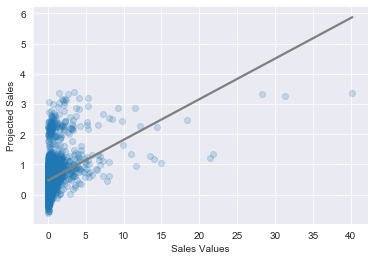

In [187]:
sns.regplot(y_test, ridge.predict(X_test_ohe_ss), ci=False, 
            scatter_kws={'alpha': 0.2}, line_kws={"color": "grey"})
plt.xlabel('Sales Values')
plt.ylabel('Projected Sales');

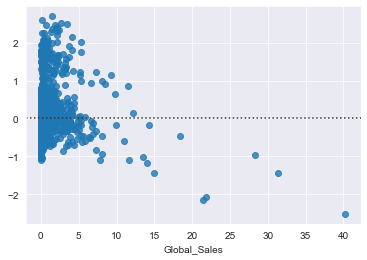

In [188]:
sns.residplot(y_test, ridge.predict(X_test_ohe_ss))

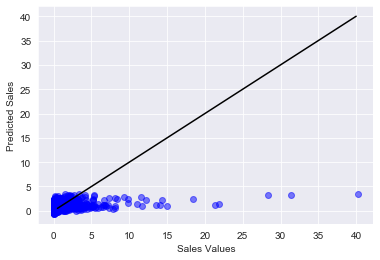

In [172]:
fix, ax = plt.subplots()
ax.scatter(y_test, ridge.predict(X_test_ohe_ss),
                alpha=0.5, label="model output", color="blue");
plt.xlabel('Sales Values')
plt.ylabel('Predicted Sales')

y_equals_x = np.linspace(.5, 40)
ax.plot(y_equals_x, y_equals_x, label="predicted = actual", color="black");

#### Lasso

In [88]:
lasso = Lasso(alpha=0.0)

lasso.fit(X_train_ohe_ss, y_train)
print(lasso.score(X_train_ohe_ss, y_train))
print(mean_absolute_error(y_train, lasso.predict(X_train_ohe_ss)))

0.1628515612492465
0.5053368810357185


In [91]:
cross_val_score(lasso, X_train_ohe_ss, y_train)

array([-9.15842614e+03, -2.63760063e+05, -8.10237084e+07, -2.06385298e+05,
       -8.59870712e+06])

In [89]:
print(lasso.score(X_test_ohe_ss, y_test))
print(mean_absolute_error(y_test, lasso.predict(X_test_ohe_ss)))

0.14775387056342792
0.547694995244981


### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=100, weights='uniform', algorithm = 'brute', p=1)

knr.fit(X_train_ohe, y_train)

knr.score(X_train_ohe, y_train)

In [ ]:
cross_val_score(knr, X_train_ohe, y_train, cv = 3)

In [ ]:
knr.score(X_test_ohe, y_test)

In [ ]:
dtr = DecisionTreeRegressor(random_state=42)

param_grid={'n_neighbors':[10, 100 ,500],
            'weights': ['uniform','distance'],
            'algorithm': ['ball_tree','kd_tree','brute' ]}

gridsearch = GridSearchCV(knr, param_grid, cv=5)

gridsearch.fit(X_train_ohe, y_train);

gridsearch.best_params_

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=300, random_state=42,)

rfr.fit(X_train_ohe, y_train)

rfr.score(X_train_ohe, y_train)

In [ ]:
cross_val_score(rfr, X_train_ohe, y_train, cv = 3)

In [ ]:
rfr.score(X_test_ohe, y_test)

In [ ]:
dtr = DecisionTreeRegressor(random_state=42)

param_grid={'max_depth':[10, 50 ,100],
            'n_estimators':[100, 200, 300],
            'min_samples_split':[5, 10, 20]}

gridsearch = GridSearchCV(dtr, param_grid, cv=3)

gridsearch.fit(X_train_ohe, y_train);

gridsearch.best_params_

### Boosters

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

#### Adaboost Regressor

In [ ]:
abr = AdaBoostRegressor(random_state=42)

abr.fit(X_train_ohe, y_train)

abr.score(X_train_ohe, y=y_train)

In [ ]:
cross_val_score(abr, X_train_ohe, y_train, cv=5).mean()

In [ ]:
abr.fit(X_test_ohe, y_test)
abr.score(X_test_ohe, y=y_test)

#### Gradient Boost Regressor

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train_ohe, y=y_train)

gbr.score(X_train_ohe, y_train)

In [ ]:
cross_val_score(gbr, X_train_ohe, y_train, cv=5).mean()

In [ ]:
abr.fit(X_test_ohe, y=y_test)
gbr.score(X_test_ohe, y_test)

### PCA

In [96]:
# Trying PCA to reduce the number of features the regression functions are using

from sklearn.decomposition import PCA

pca = PCA(n_components=200, random_state=42)

pca.fit(X_train_ohe)
X_train_ohe_pca = pca.transform(X_train_ohe)
X_test_ohe_pca = pca.transform(X_test_ohe)
X_train_ohe_pca.shape

(13032, 200)

#### Linear Regression

In [70]:
linreg.fit(X_train_ohe_pca, y_train)
print(linreg.score(X_train_ohe_pca, y_train))
print(mean_absolute_error(y_train, linreg.predict(X_train_ohe_pca)))

0.1592426529452703
0.511708241631968


In [71]:
cross_val_score(linreg, X_train_ohe_pca, y_train, cv = 3)

array([0.14520926, 0.1365804 , 0.14142958])

#### Ridge

In [97]:
ridge.fit(X_train_ohe_pca, y_train)
print(ridge.score(X_train_ohe_pca, y_train))
print(mean_absolute_error(y_train, ridge.predict(X_train_ohe_pca)))

0.1589719451330145
0.5098905757958391


In [98]:
cross_val_score(ridge, X_train_ohe_pca, y_train, cv = 3)

array([0.14721809, 0.13948926, 0.14086319])

In [75]:
ridge.score(X_test_ohe_pca, y_test)

0.14823565292137642

#### Lasso

In [76]:
lasso = Lasso(alpha=0.0)

lasso.fit(X_train_ohe_pca, y_train)
print(lasso.score(X_train_ohe_pca, y_train))
print(mean_absolute_error(y_train, lasso.predict(X_train_ohe_pca)))

0.1592426529452703
0.5117082416319679


In [77]:
cross_val_score(lasso, X_train_ohe_pca, y_train, cv = 3)

array([0.14520926, 0.1365804 , 0.14142958])

In [78]:
lasso.score(X_test_ohe_pca, y_test)

0.14799600564927695

In [ ]:
model_log = linreg.fit(X_train_ohe_pca, y_train)
y_hat_test = linreg.predict(X_test_ohe_pca)

# Import roc_curve, auc
from sklearn.metrics import roc_curve, auc

# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train_ohe_pca)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test_ohe_pca)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

In [ ]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

In [ ]:
train_mse = []
test_mse = []
alphas = []

for alpha in np.linspace(0, 200, num=50):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_ohe_pca, y_train)
    
    train_preds = lasso.predict(X_train_ohe_pca)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_ohe_pca)
    test_mse.append(mean_squared_error(y_test, test_preds))
    
    alphas.append(alpha)

                               
fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

#### KNR

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=100, weights='uniform', algorithm = 'brute', p=1)

knr.fit(X_train_ohe_pca, y_train)

print(knr.score(X_train_ohe_pca, y_train))
print(mean_absolute_error(y_train, knr.predict(X_train_ohe_pca)))

In [ ]:
cross_val_score(knr, X_train_ohe_pca, y_train, cv = 3)

#### RFR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=300, random_state=42)

rfr.fit(X_train_ohe_pca, y_train)

rfr.score(X_train_ohe_pca, y_train)
print(mean_absolute_error(y_train, rfr.predict(X_train_ohe_pca)))

In [ ]:
cross_val_score(rfr, X_train_ohe_pca, y_train, cv = 3)

### Neural Network

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

In [ ]:
model = models.Sequential()

model.add(layers.Dense(50, activation='linear', bias_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(75, activation='linear', bias_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(100, activation='linear', bias_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='linear', bias_regularizer=regularizers.l2(0.01)))

early_stop = EarlyStopping(monitor='loss', min_delta=1e-8, patience=1, verbose=1,
                           mode='min')

model.compile(optimizer='SGD', 
              loss='categorical_crossentropy', 
              metrics='accuracy')

results = model.fit(X_train_ohe, y_train, epochs=5, batch_size=1, callbacks=[early_stop])

### SVR

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')

svr.fit(X_train_ohe, y_train)
svr.score(X_train_ohe, y_train)

In [ ]:
mean_absolute_error(y_train, svr.predict(X_train_ohe))